# Notebook Imports

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

# Gather Data

In [240]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header = None)
np_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2] 
data = pd.DataFrame(np_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT'])
data['PRICE'] = target

In [148]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [149]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [150]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning Data - Check for missing values

In [152]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

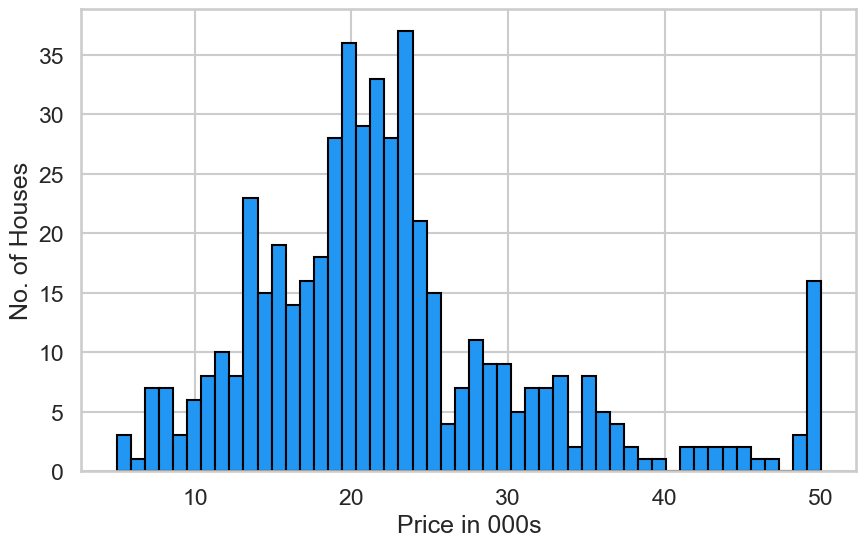

In [155]:
plt.figure(figsize = (10, 6))
plt.hist(data['PRICE'],bins = 50, ec= 'black', color = '#2196f3'  )
plt.xlabel('Price in 000s')
plt.ylabel('No. of Houses')
plt.show()

<Figure size 10000x6000 with 0 Axes>

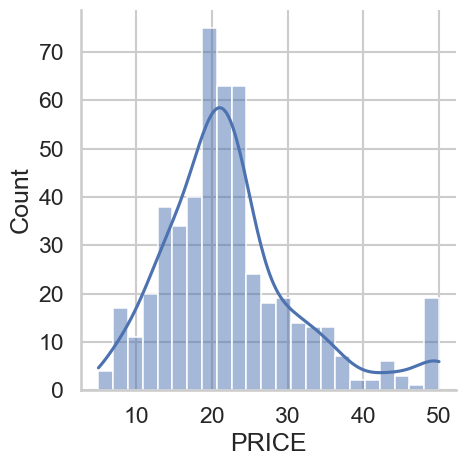

In [156]:
plt.figure(figsize = (100, 60))
sns.displot(data['PRICE'], kde = 'True', kind = 'hist' )
plt.show()

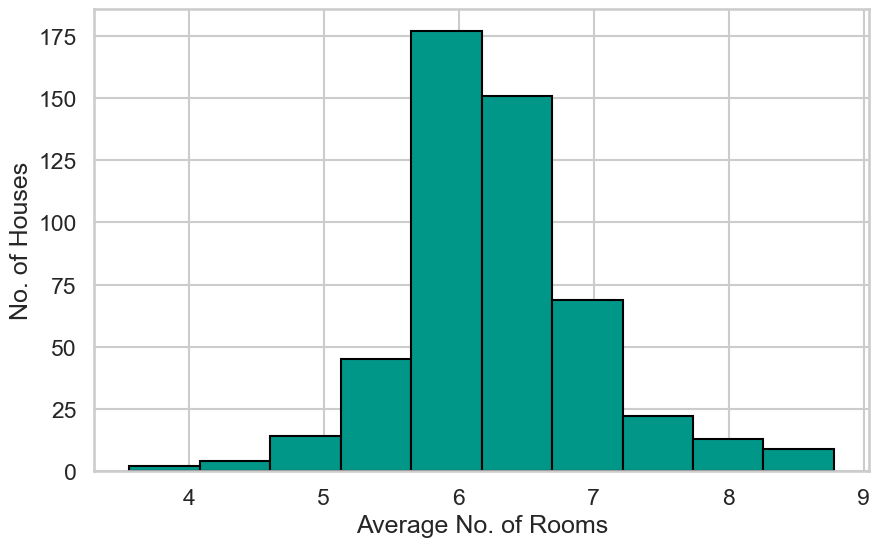

In [157]:
plt.figure(figsize = (10, 6))
plt.hist(data['RM'], ec= 'black', color = '#009688'  )
plt.xlabel('Average No. of Rooms')
plt.ylabel('No. of Houses')
plt.show()

In [158]:
data['RM'].mean()

6.284634387351779

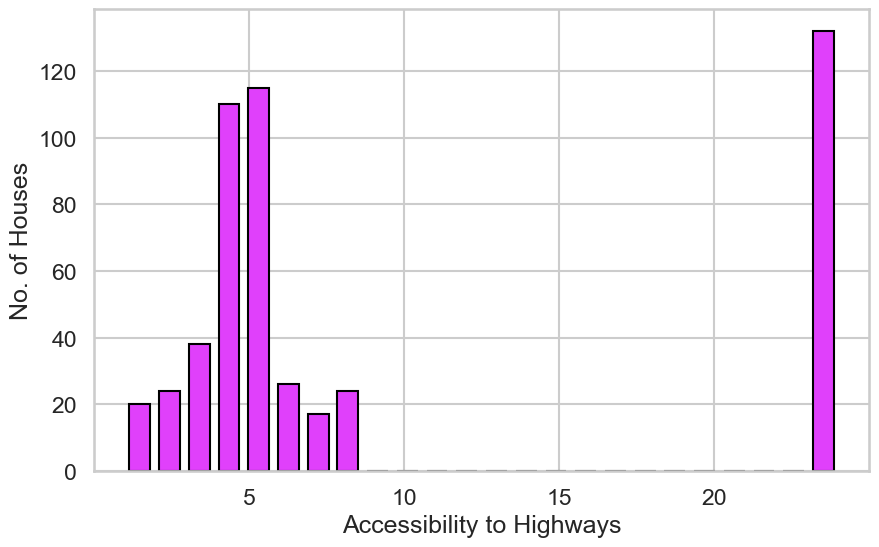

In [159]:
plt.figure(figsize = (10, 6))
plt.hist(data['RAD'], bins=24, ec= 'black', color = '#E040FB', rwidth = 0.7  )
plt.xlabel('Accessibility to Highways')
plt.ylabel('No. of Houses')
plt.show()

In [160]:
data['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

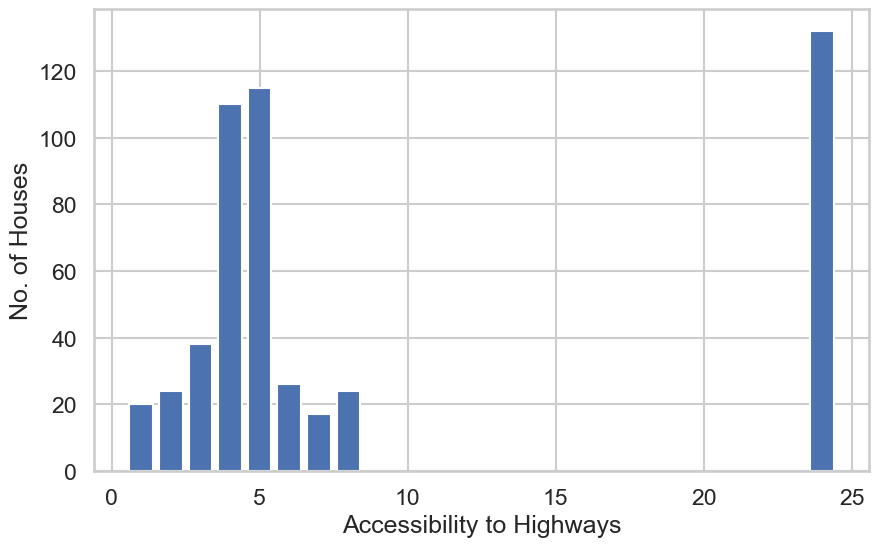

In [161]:
frequency = data['RAD'].value_counts()
plt.figure(figsize = (10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('No. of Houses')
plt.bar(frequency.index, height = frequency)
plt.show()

## Descriptive Statistics

In [163]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [164]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [165]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [166]:
PT_corr= data['PRICE'].corr(data['PTRATIO'])
print(f'Correlation between the price and the teacher pupile ratio is:{PT_corr}' )

Correlation between the price and the teacher pupile ratio is:-0.5077866855375615


In [167]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [168]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

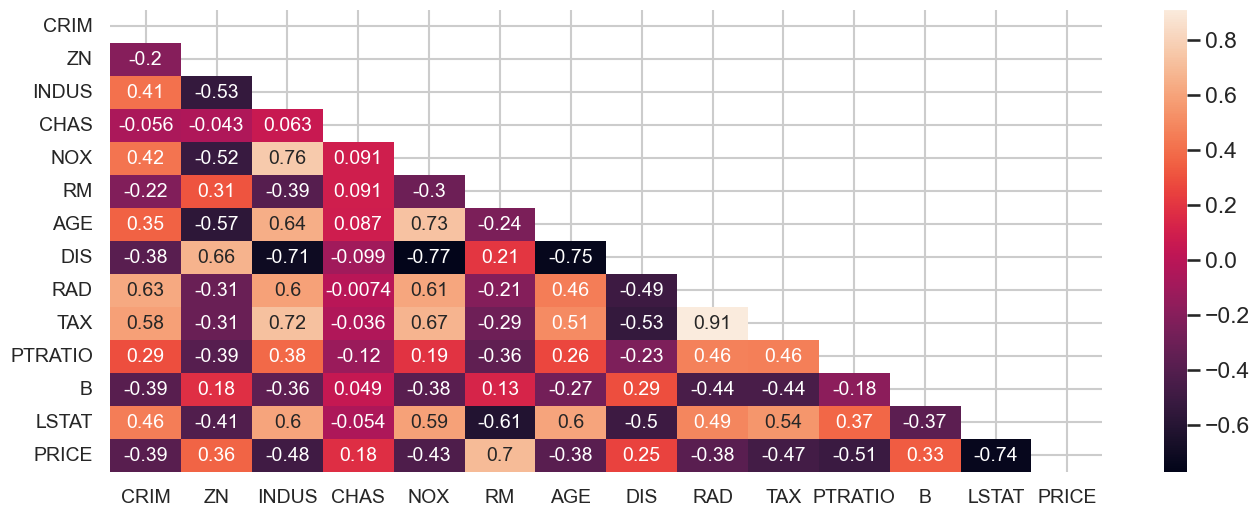

In [169]:
plt.figure(figsize = (16, 6))
sns.heatmap(data.corr(), mask= mask, annot = True, annot_kws = {"size": 14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


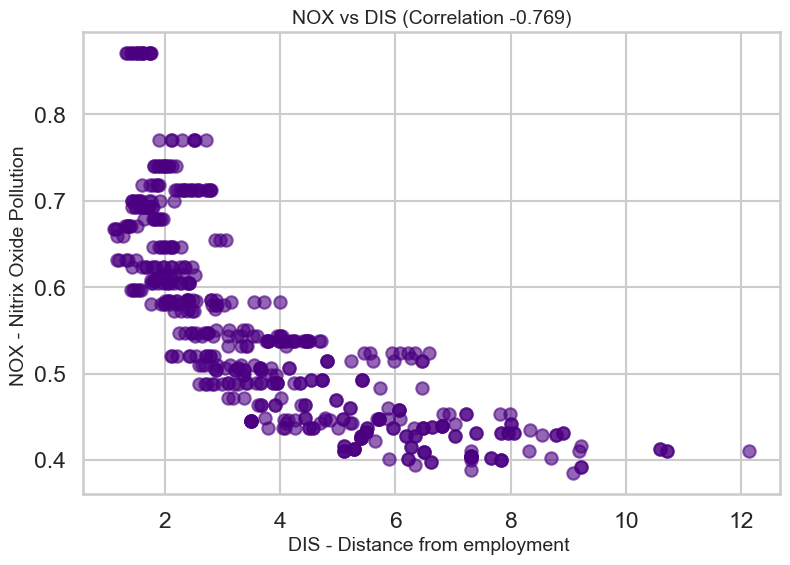

In [170]:
NOX_DIS_Corr = round(data['NOX'].corr(data['DIS']), 3)
plt.figure(figsize = (9, 6))
plt.scatter(x= data['DIS'], y= data['NOX'], alpha = 0.6, s=80, color = 'indigo')
plt.title(f'NOX vs DIS (Correlation {NOX_DIS_Corr})', fontsize = 14)
plt.xlabel('DIS - Distance from employment ', fontsize = 14)
plt.ylabel('NOX - Nitrix Oxide Pollution ', fontsize = 14)
plt.show()

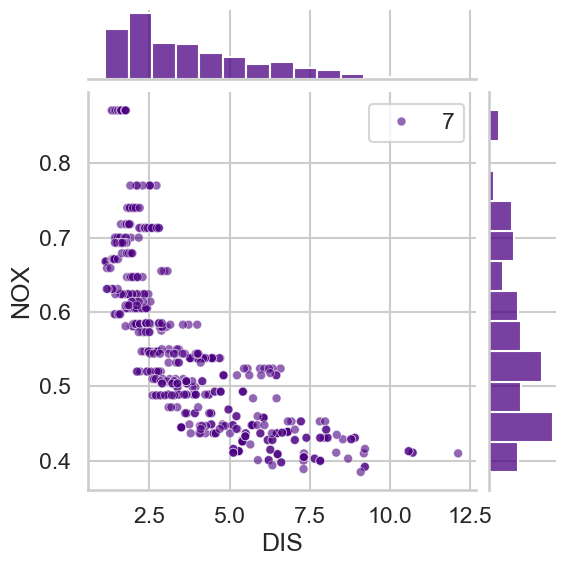

In [171]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], size = 7, color = 'indigo', joint_kws ={'alpha': 0.6} )
plt.show()

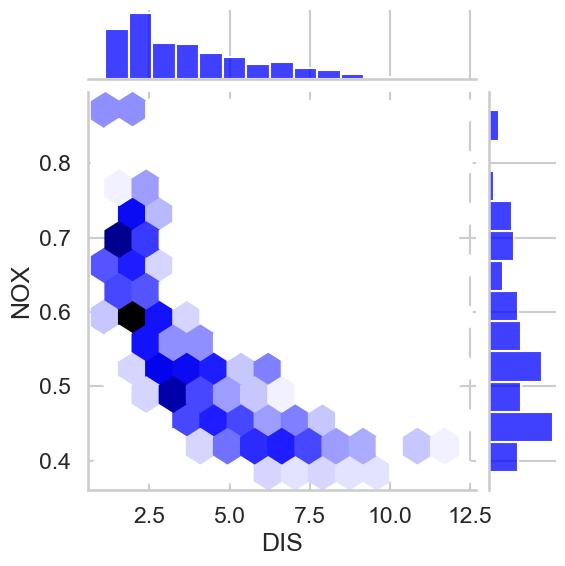

In [172]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', color = 'blue' )
plt.show()

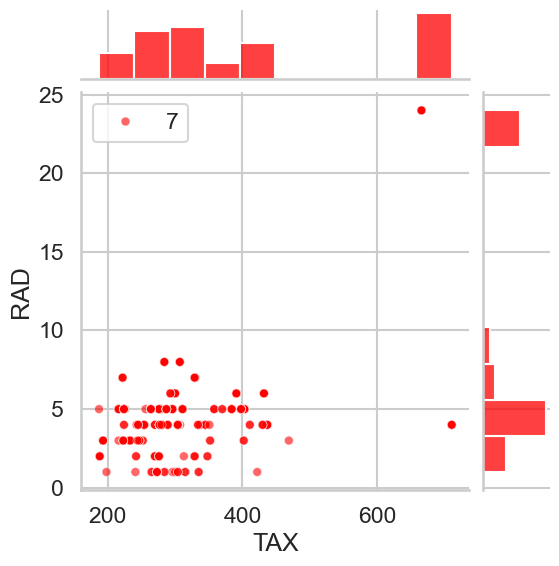

In [173]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], size = 7, color = 'RED', joint_kws ={'alpha': 0.6} )
plt.show()

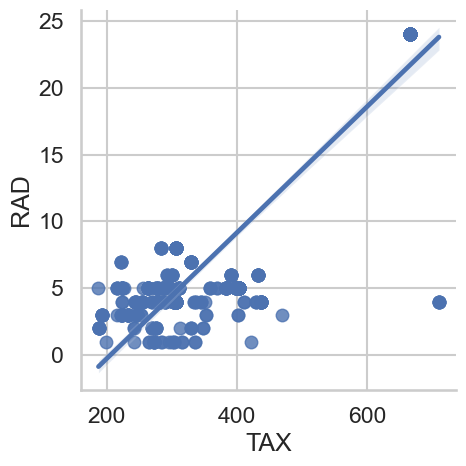

In [174]:
sns.lmplot(x= 'TAX', y='RAD', data= data)
plt.show()

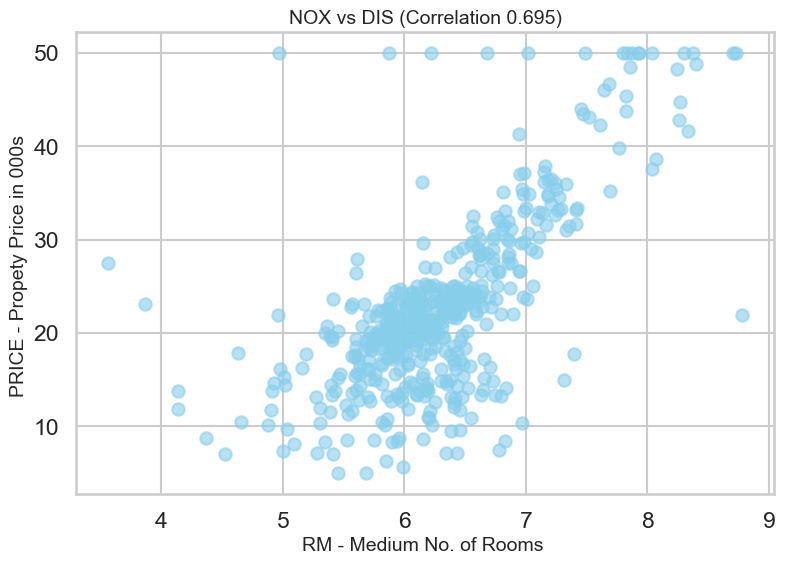

In [175]:
RM_PRICE_Corr = round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize = (9, 6))
plt.scatter(x= data['RM'], y= data['PRICE'], alpha = 0.6, s=80, color = 'skyblue')
plt.title(f'NOX vs DIS (Correlation {RM_PRICE_Corr})', fontsize = 14)
plt.xlabel('RM - Medium No. of Rooms ', fontsize = 14)
plt.ylabel('PRICE - Propety Price in 000s ', fontsize = 14)
plt.show()

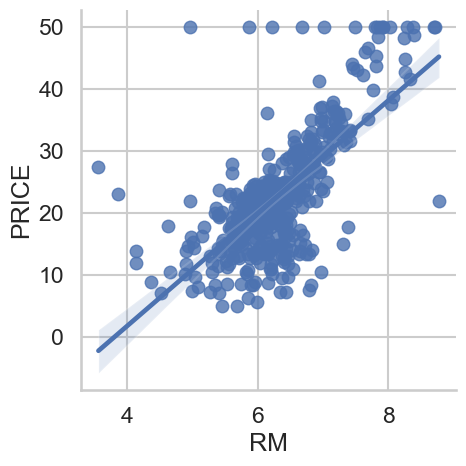

In [176]:
sns.lmplot(x= 'RM', y='PRICE', data= data)
plt.show()

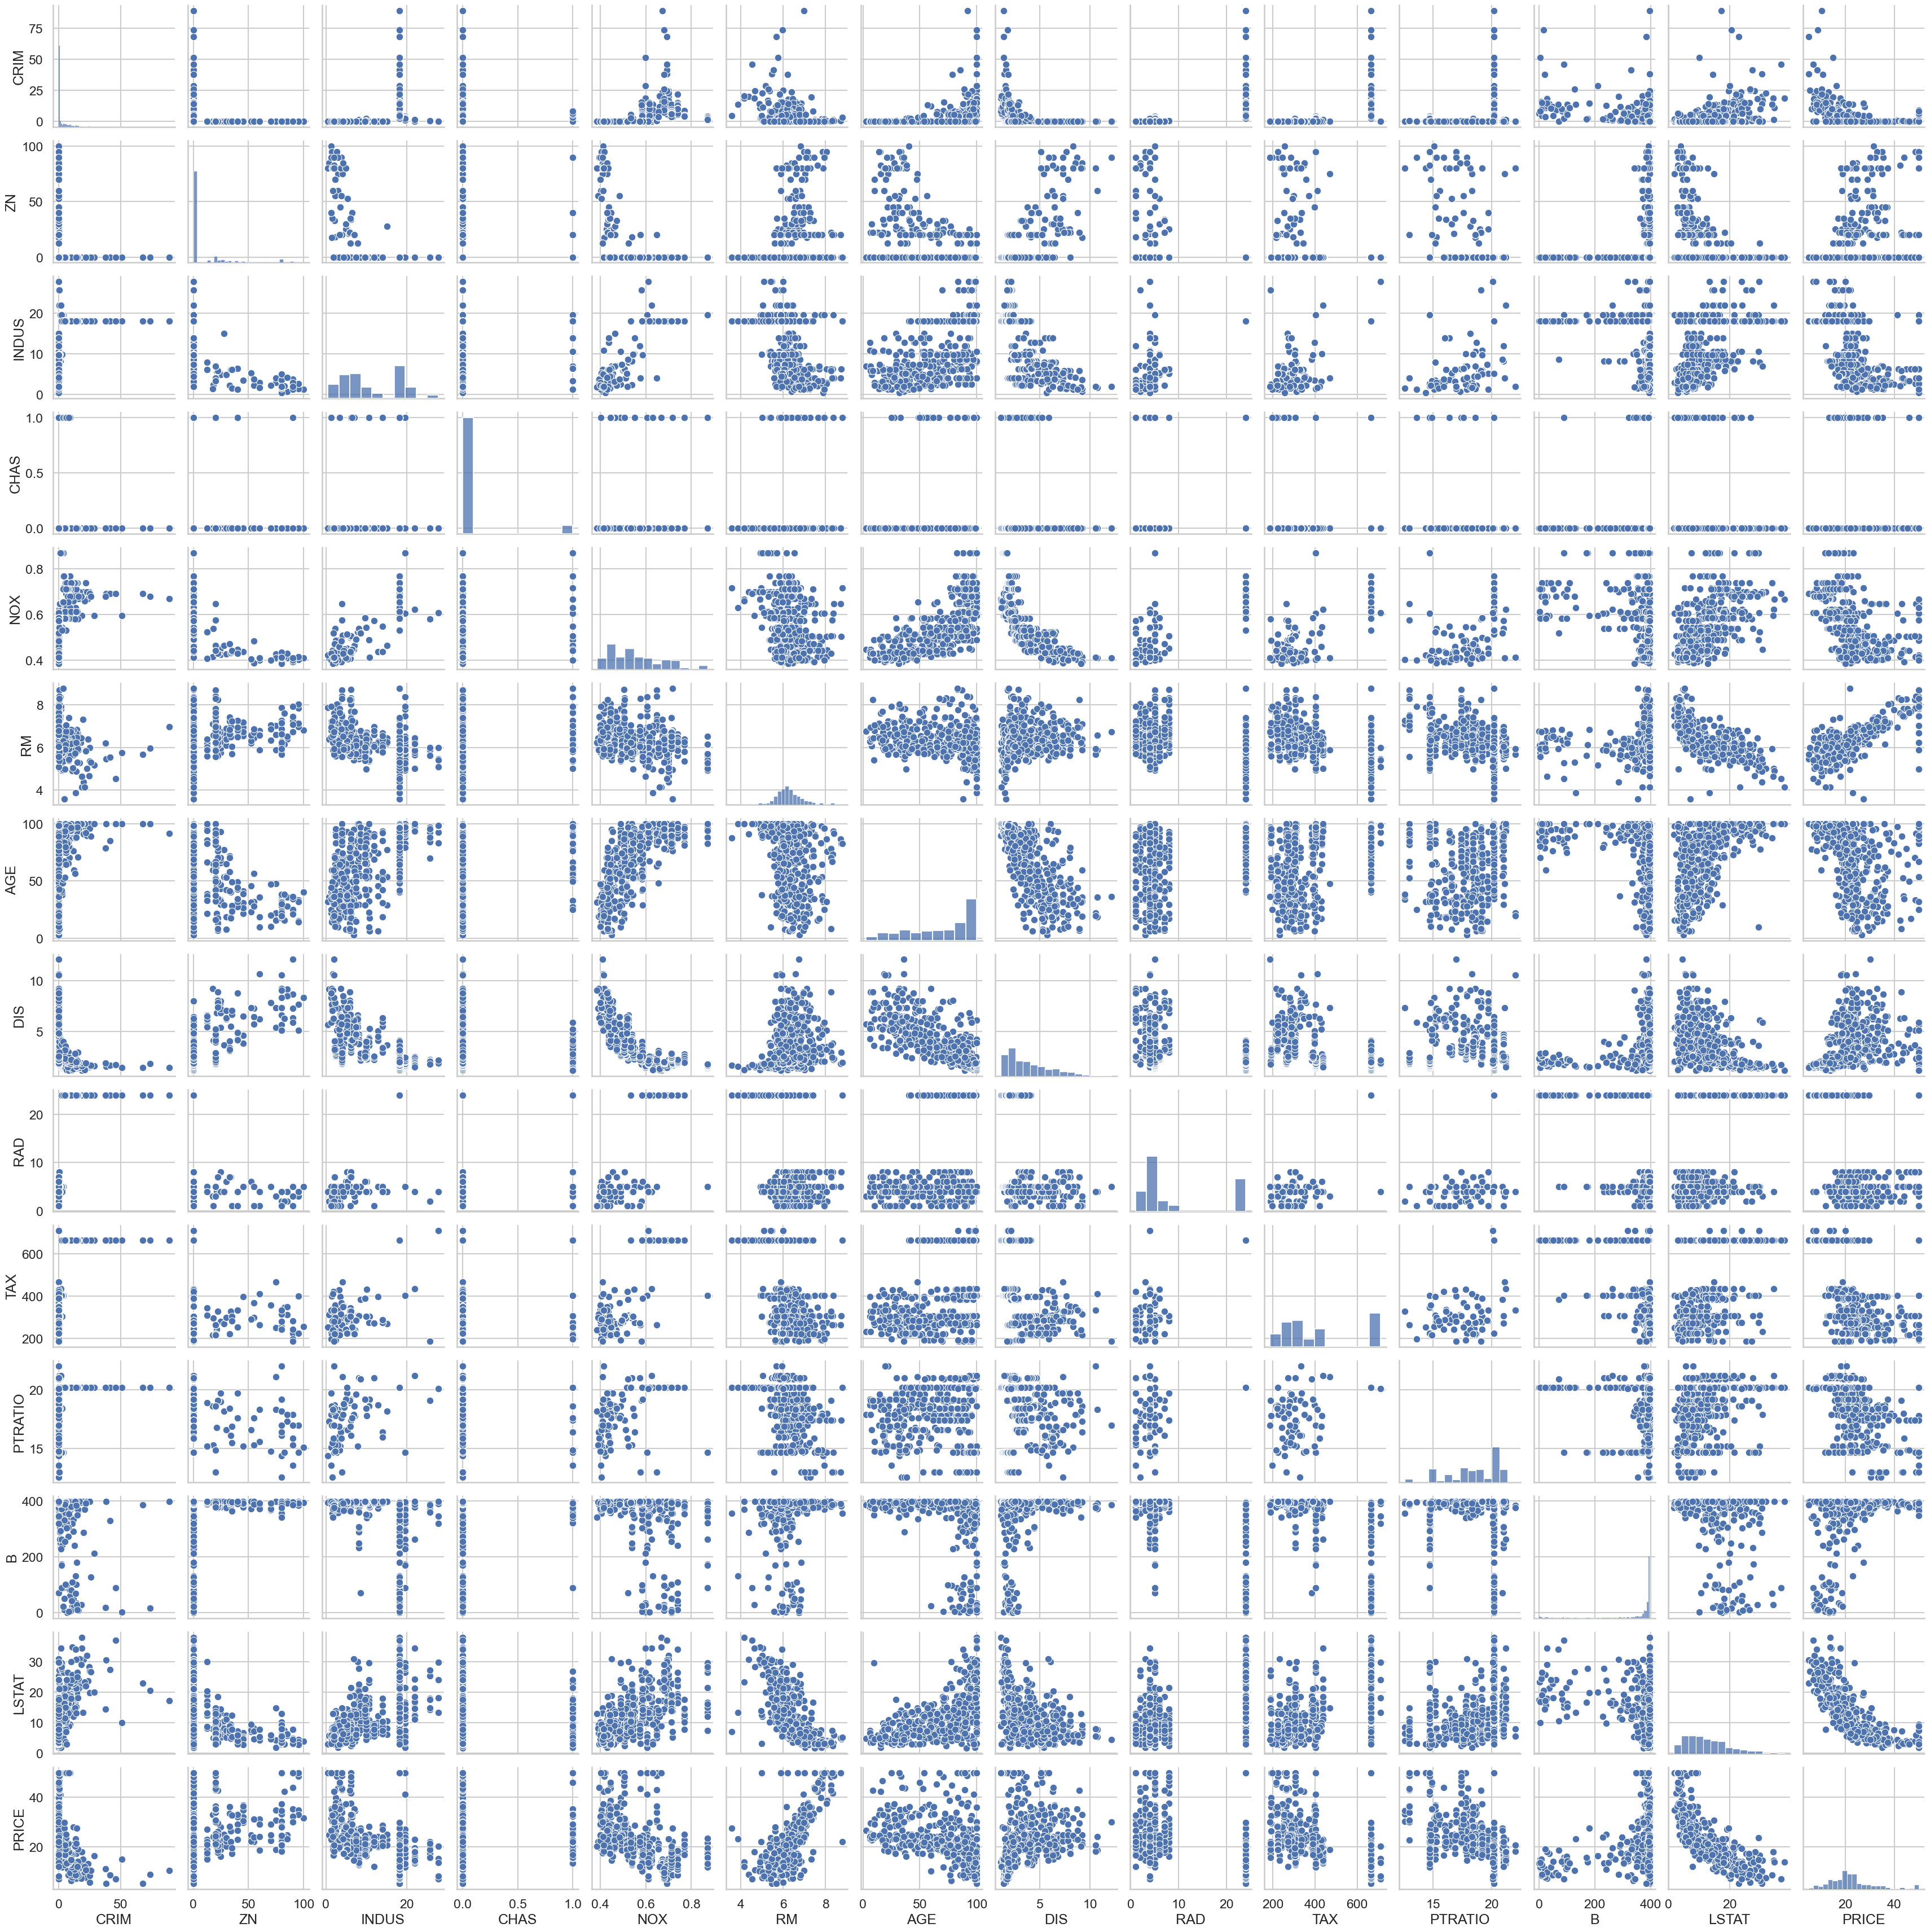

CPU times: total: 33.8 s
Wall time: 1min 4s


In [177]:
%%time

sns.pairplot(data)
plt.show()

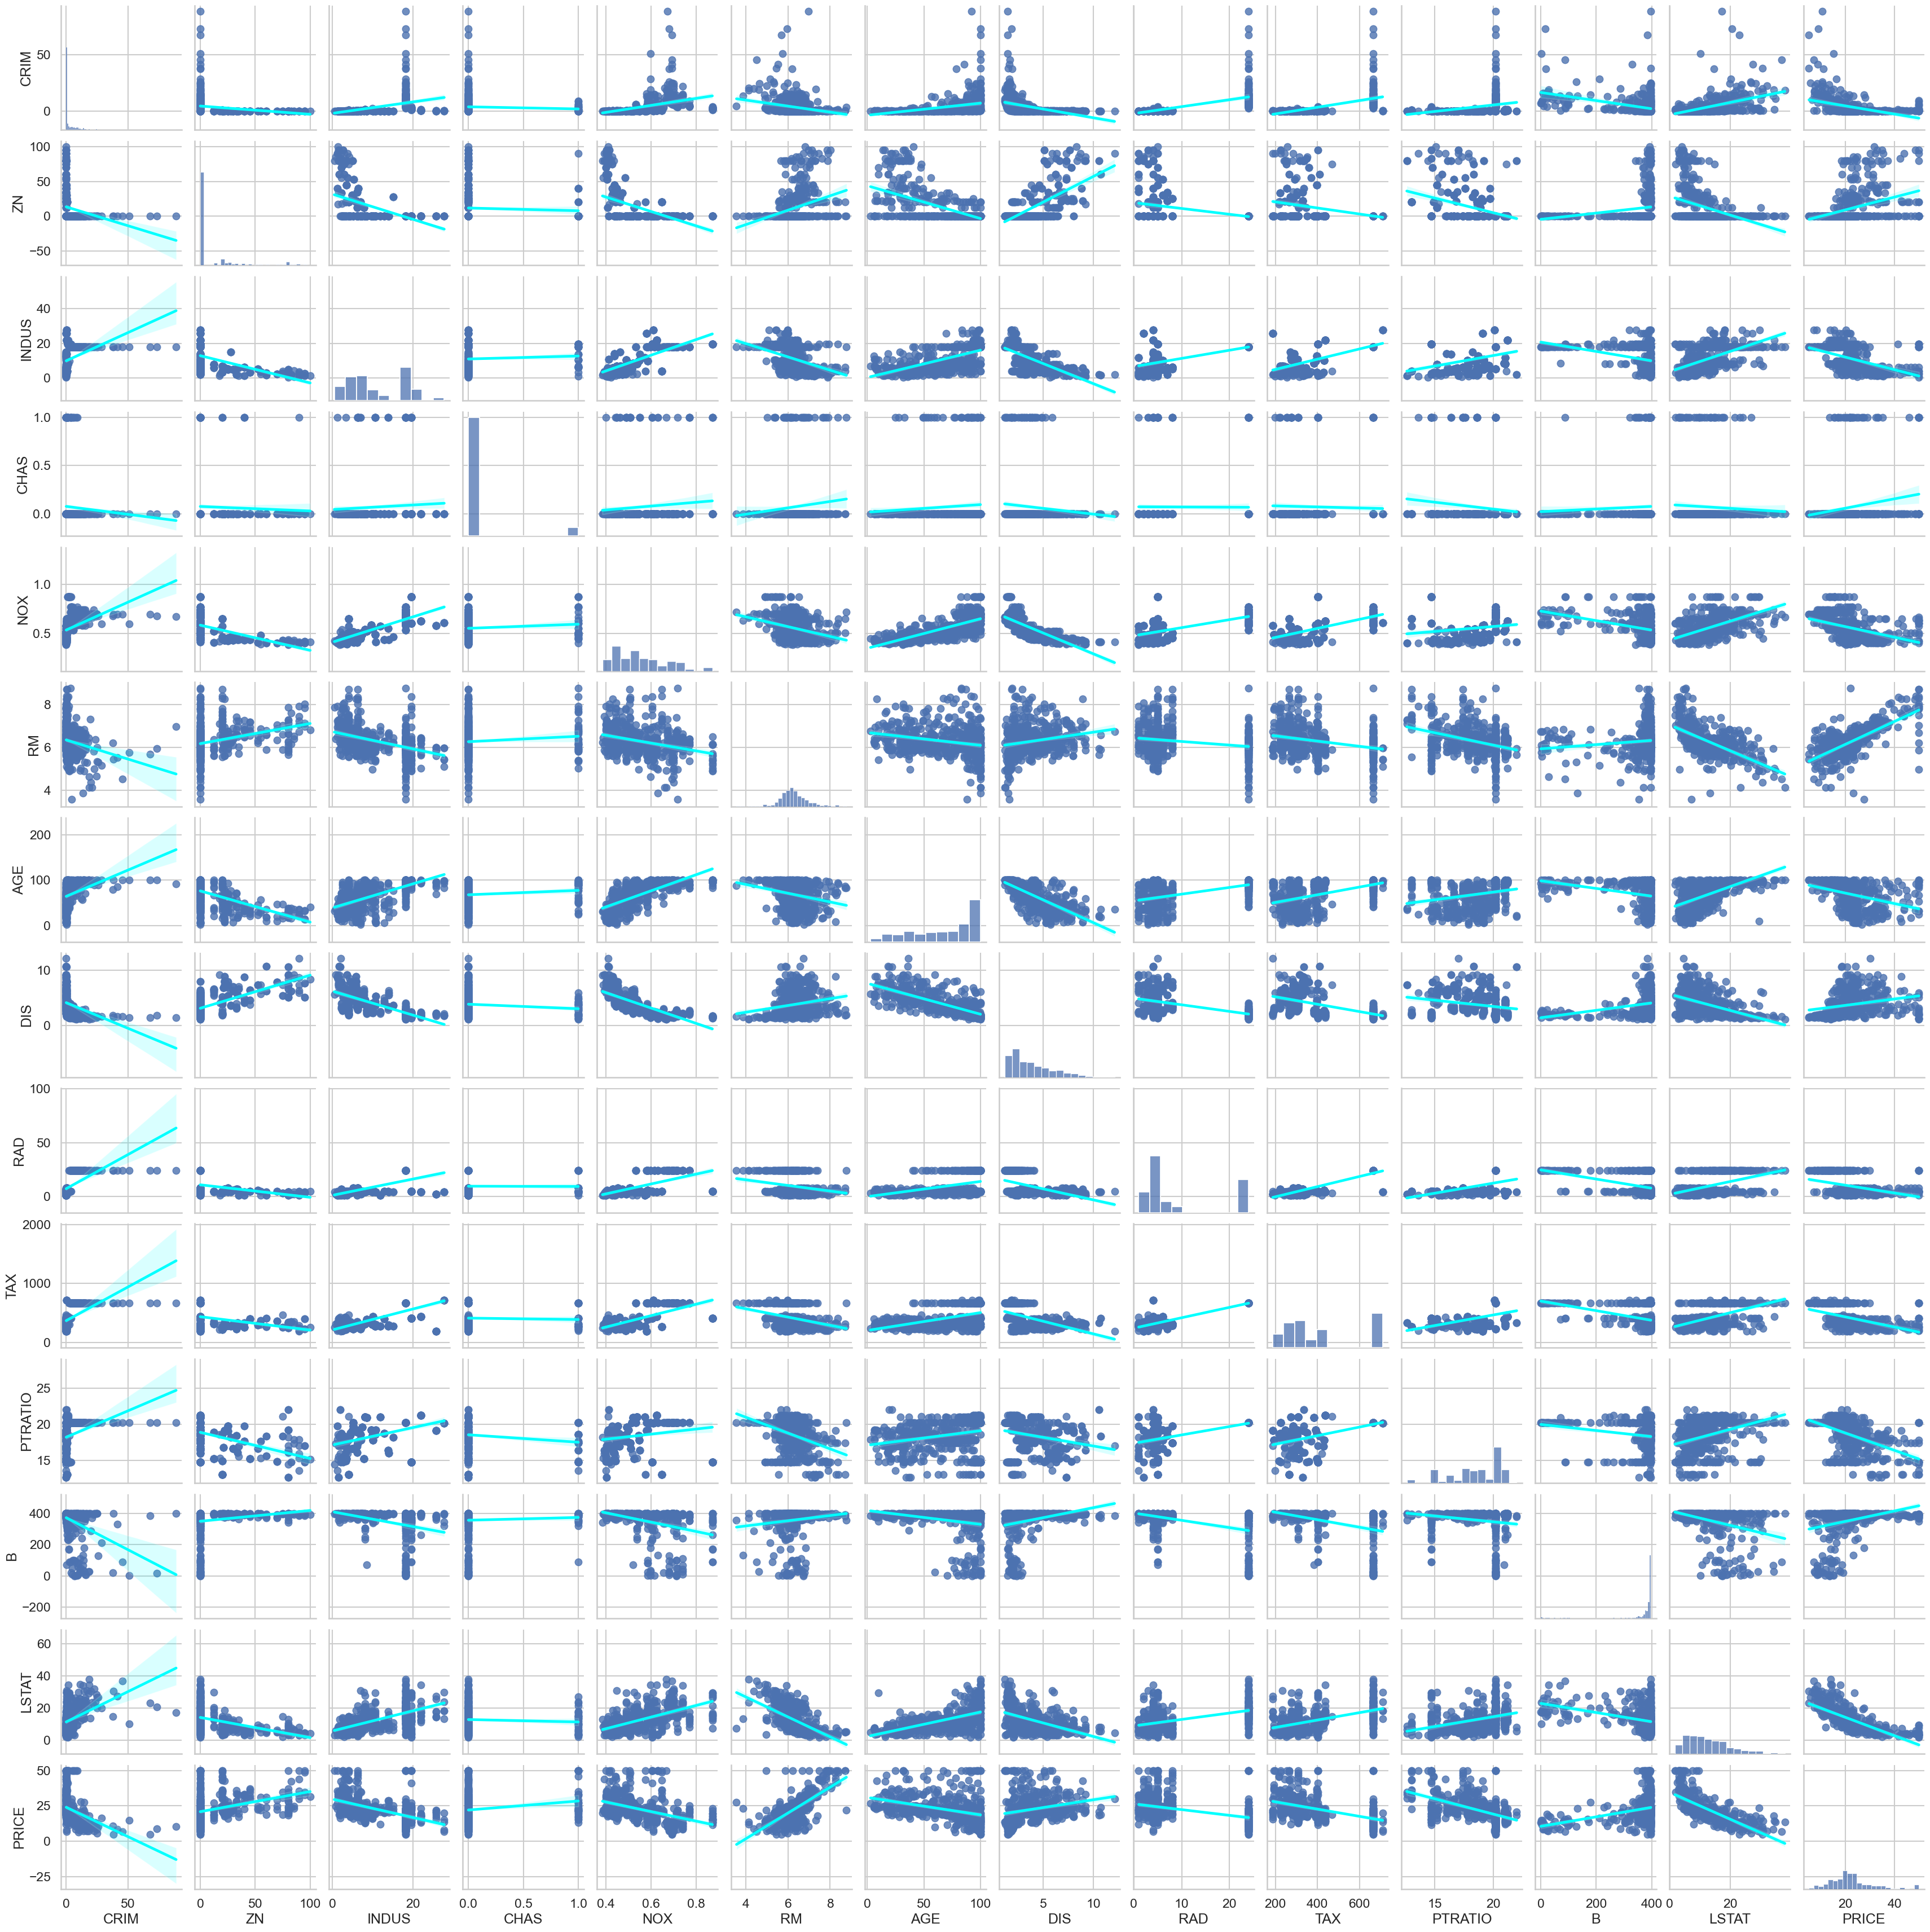

CPU times: total: 1min
Wall time: 1min 39s


In [178]:
%%time

sns.pairplot(data, kind='reg', plot_kws ={'line_kws': {'color':'cyan'}})
plt.show()

## Training and Test detaset Split

In [180]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1 )

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state = 10)

In [181]:
len(X_train)/len(features)

0.7984189723320159

## Multivariable Regression

In [183]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

print('Training data r-squared:', regr.score(X_train, Y_train))
print('Test data r-squared:', regr.score(X_test, Y_test))

print('intercept:', regr.intercept_)
pd.DataFrame(data= regr.coef_, index = X_train.columns, columns= ['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115624
intercept: 36.53305138282413


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformation

In [185]:
data['PRICE'].skew()

1.1080984082549072

In [186]:
y_log = np.log(data['PRICE'])

In [187]:
y_log.skew()

-0.33032129530987864

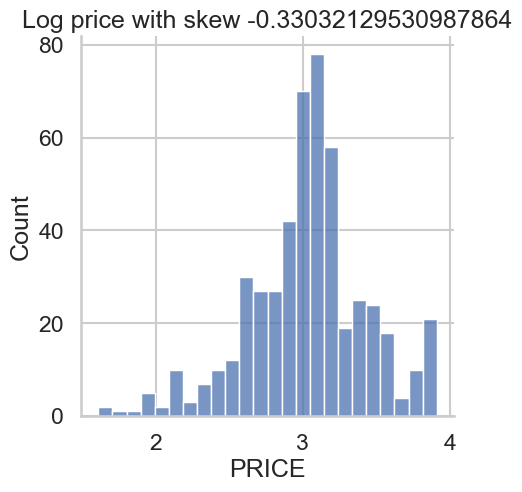

In [188]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

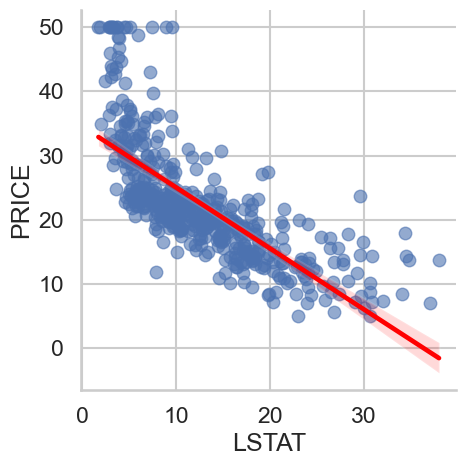

In [189]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()

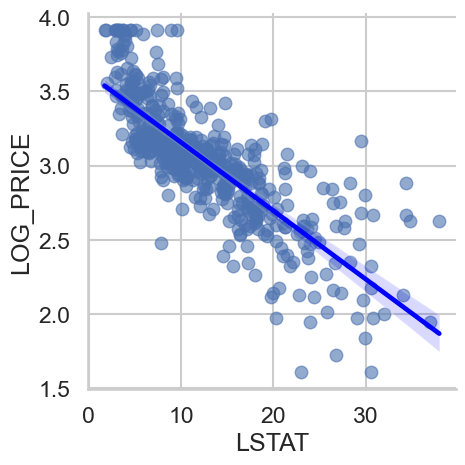

In [190]:
transformed_data= features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.show()

## Regression using log prices

In [192]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1 )

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state = 10)

regr = LinearRegression()
regr.fit(X_train, Y_train)

print('Training data r-squared:', regr.score(X_train, Y_train))
print('Test data r-squared:', regr.score(X_test, Y_test))

print('intercept:', regr.intercept_)
pd.DataFrame(data= regr.coef_, index = X_train.columns, columns= ['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260735
intercept: 4.059943871775191


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

## P-Values and Evaluating Coefficients

In [194]:
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-values':round(results.pvalues,3)})


coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity
$$ TAX = \alpha_0 + \alpha_1 \text{RM} + \alpha_2 \text{NOX} + \dots + \alpha_{12} \text{LSTAT} $$ 
$$ VIF _\text{TAX} = \frac{1}{1 - R_\text{TAX}^2} $$



In [196]:
variance_inflation_factor(exog = x_incl_const.values, exog_idx = 1)

1.714525044393249

In [197]:
for i in range (x_incl_const.shape[1]):
    print(variance_inflation_factor(exog = x_incl_const.values, exog_idx = i))
print('All Done!')


597.5487126763895
1.714525044393249
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.3386713255364715
2.812544292793036
All Done!


In [198]:
vif =[]
for i in range (x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog = x_incl_const.values, exog_idx = i))
print(vif)

[597.5487126763895, 1.714525044393249, 2.3328224265597597, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


In [199]:
vif = [variance_inflation_factor(exog = x_incl_const.values, exog_idx = i) for i in range (x_incl_const.shape[1])]
pd.DataFrame({'coef_name': x_incl_const.columns, 'vif':np.around(vif, 2)} )

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification and the BIC 

In [201]:
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values':round(results.pvalues,3)})
print('BIC is ', results.bic)
print('rsquared is', results.rsquared)

BIC is  -139.74997769478875
rsquared is 0.7930234826697583


In [202]:
#Reduce model No 01 # Excluding INDUS
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

coef_minus_indus= pd.DataFrame({'coef': results.params, 'p-values':round(results.pvalues,3)})
print('BIC is ', results.bic)
print('rsquared is', results.rsquared)

BIC is  -145.14508855591185
rsquared is 0.7927126289415164


In [203]:
#Reduce model No 01 # Excluding INDUS and AGE
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

Reduced_coef = pd.DataFrame({'coef': results.params, 'p-values':round(results.pvalues,3)})
print('BIC is ', results.bic)
print('rsquared is', results.rsquared)

BIC is  -149.499342942247
rsquared is 0.7918657661852817


In [204]:
frames = [org_coef, coef_minus_indus, Reduced_coef]
pd.concat(frames, axis = 1)



coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residual Plots

<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\3526641781.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Predicated log Prices $\hat y _i$', fontsize = 14)
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\3526641781.py:24: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f'Actual vs predicted log house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)


Text(0.5, 1.0, 'Actual vs predicted log house prices: $y _i$ vs. $\\hat y _i$ (corr 0.89) ')

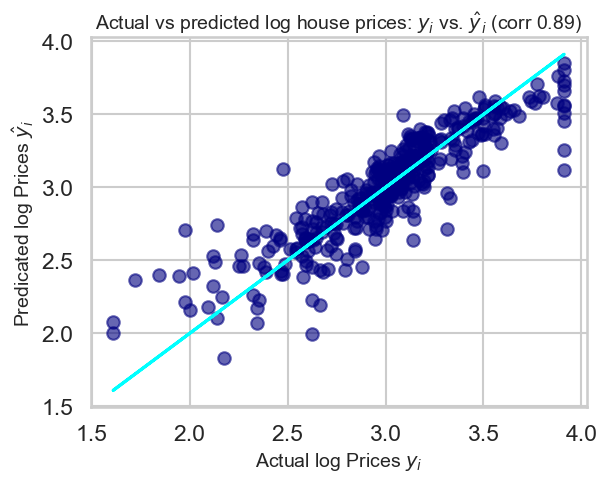

In [206]:
#Modified Model: #Transformed (Using log prices) and simplified (by dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS', 'AGE'], axis=1 )

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state = 10)

#Using Statsmodel
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

#Residuals 
#residuals = Y_train - results.fittedvalues
#results.resid

#Graph of actual versus predicted log prices
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(x=Y_train, y= results.fittedvalues, alpha = 0.6, c='Navy')
plt.plot(Y_train,Y_train, color = 'cyan')

plt.xlabel('Actual log Prices $y _i$', fontsize = 14)
plt.ylabel('Predicated log Prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)



<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\4036243115.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Predicated Prices in 000s $\hat y _i$', fontsize = 14)
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\4036243115.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f'Actual vs predicted house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)


Text(0.5, 1.0, 'Actual vs predicted house prices: $y _i$ vs. $\\hat y _i$ (corr 0.89) ')

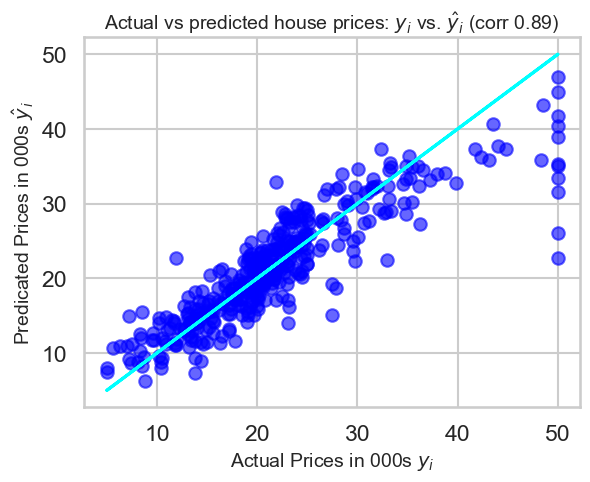

In [207]:
#Graph of actual versus predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(x=np.e**Y_train, y= np.e**results.fittedvalues, alpha = 0.6, c='Blue')
plt.plot(np.e**Y_train,np.e**Y_train, color = 'cyan')

plt.xlabel('Actual Prices in 000s $y _i$', fontsize = 14)
plt.ylabel('Predicated Prices in 000s $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)

Text(0.5, 1.0, 'Residuals Vs Fitted Values ')

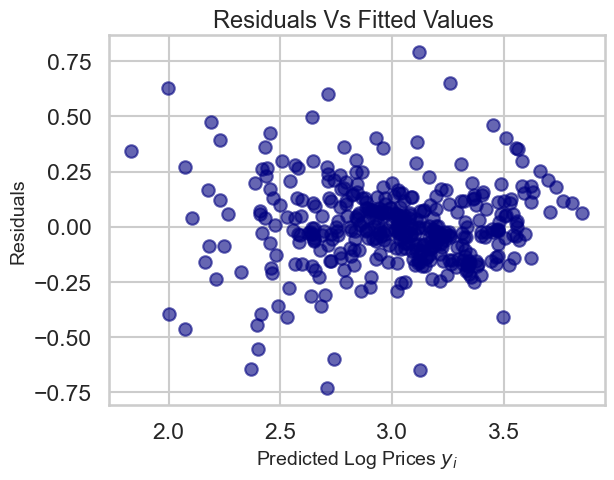

In [214]:
#Residuals versus predicted values
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(x=results.fittedvalues, y= results.resid, alpha = 0.6, c='navy')


plt.xlabel('Predicted Log Prices $y _i$', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title(f'Residuals Vs Fitted Values ', fontsize = 17)

## Distribution of Residuals (log prices) - checking for normality 

C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\3340212663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (results.resid, color = 'navy')


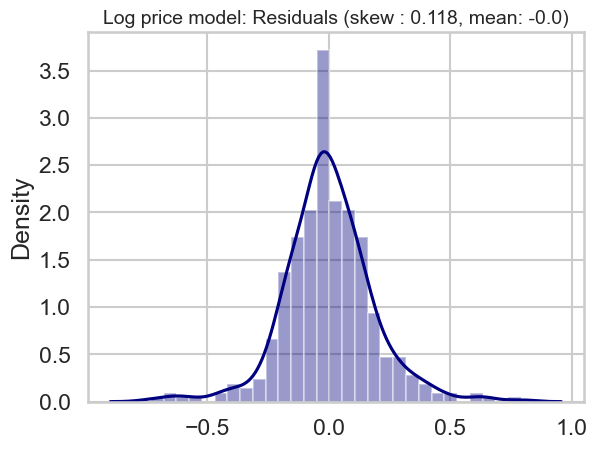

In [216]:
resid_mean = round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(),3)

sns.distplot (results.resid, color = 'navy')
plt.title(f'Log price model: Residuals (skew : {resid_skew}, mean: {resid_mean})', fontsize = 14)
plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\3175798325.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Predicated log Prices $\hat y _i$', fontsize = 14)
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_5788\3175798325.py:24: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f'Actual vs predicted log house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)


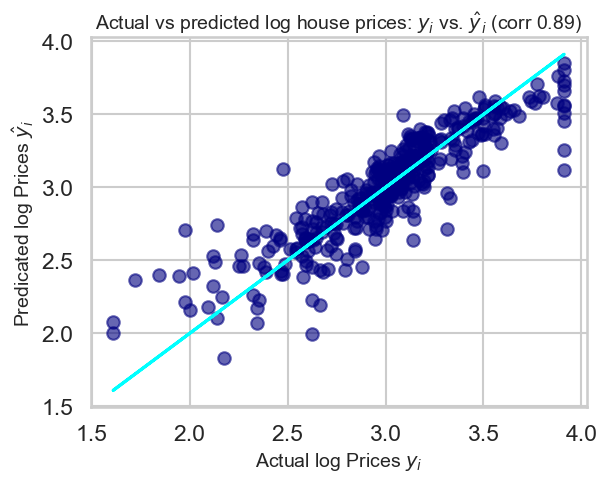

In [220]:
#Modified Model: #Transformed (Using log prices) and simplified (by dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS', 'AGE'], axis=1 )

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
                                                    test_size = 0.2, random_state = 10)

#Using Statsmodel
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()

#Residuals 
#residuals = Y_train - results.fittedvalues
#results.resid

#Graph of actual versus predicted log prices
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(x=Y_train, y= results.fittedvalues, alpha = 0.6, c='Navy')
plt.plot(Y_train,Y_train, color = 'cyan')

plt.xlabel('Actual log Prices $y _i$', fontsize = 14)
plt.ylabel('Predicated log Prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log house prices: $y _i$ vs. $\hat y _i$ (corr {corr}) ', fontsize = 14)

#Mean Square Error & R-squared)
reduced_log_mse= round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


In [234]:
#If our estimate for a house price is $30 000, calculatte the upper and lower bound for 95% prediction interval using the reduced log price model
print('1 s.d. in log price is', np.sqrt(reduced_log_mse))
print('2 s.d. in log price is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log price for the 95% prediction interval is', upper_bound)
print('The upper bound in normal price is', np.e**upper_bound*1000)
print()
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log price for the 95% prediction interval is', lower_bound)
print('The lower bound in normal price is', np.e**lower_bound*1000)


1 s.d. in log price is 0.18708286933869708
2 s.d. in log price is 0.37416573867739417
The upper bound in log price for the 95% prediction interval is 3.7753631203395495
The upper bound in normal price is 43613.34233239937

The lower bound in log price for the 95% prediction interval is 3.0270316429847615
The lower bound in normal price is 20635.886906824155
